In [1]:
import zipfile
import os
import cv2
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving animals.zip to animals.zip


In [4]:
zip_file_path = '/content/animals.zip'
extract_folder = '/content/animals'

In [5]:
extract_zip(zip_file_path, extract_folder)

In [6]:
def load_images_from_folder(folder, label, num_images=100):
    images = []
    labels = []
    for filename in os.listdir(folder)[:num_images]:
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img.flatten())
            labels.append(label)
    return images, labels

In [7]:
cat_folder = '/content/animals/animals/cats'
dog_folder = '/content/animals/animals/dogs'
panda_folder = '/content/animals/animals/panda'

In [8]:
cat_images, cat_labels = load_images_from_folder(cat_folder, 'cat')
dog_images, dog_labels = load_images_from_folder(dog_folder, 'dog')
panda_images, panda_labels = load_images_from_folder(panda_folder, 'panda')

In [9]:
images = np.array(cat_images + dog_images + panda_images)
labels = np.array(cat_labels + dog_labels + panda_labels)

In [11]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [12]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
cv_results = []

In [15]:
for fold, (train_index, test_index) in enumerate(kf.split(images, encoded_labels), 1):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]


    knn.fit(X_train, y_train)


    y_pred = knn.predict(X_test)


    fold_accuracy = {}

    for animal_idx, animal_name in enumerate(label_encoder.classes_):

        true_indices = np.where(y_test == animal_idx)[0]
        pred_indices = np.where(y_pred == animal_idx)[0]


        correct_preds = len(np.intersect1d(true_indices, pred_indices))
        total_samples = len(true_indices)


        if total_samples > 0:
            accuracy = correct_preds / total_samples
        else:
            accuracy = 0.0

        fold_accuracy[animal_name] = accuracy


    cv_results.append(fold_accuracy)


    print(f"Fold {fold} Accuracies:")
    for animal_name, accuracy in fold_accuracy.items():
        print(f"{animal_name}: {accuracy:.4f}")
    print('-' * 30)


print("Cross-validation results:", cv_results)

Fold 1 Accuracies:
cat: 0.2500
dog: 0.5500
panda: 0.1000
------------------------------
Fold 2 Accuracies:
cat: 0.5500
dog: 0.6500
panda: 0.0500
------------------------------
Fold 3 Accuracies:
cat: 0.5000
dog: 0.6500
panda: 0.0500
------------------------------
Fold 4 Accuracies:
cat: 0.4500
dog: 0.7500
panda: 0.0500
------------------------------
Fold 5 Accuracies:
cat: 0.4500
dog: 0.7000
panda: 0.0500
------------------------------
Cross-validation results: [{np.str_('cat'): 0.25, np.str_('dog'): 0.55, np.str_('panda'): 0.1}, {np.str_('cat'): 0.55, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.5, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.75, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.7, np.str_('panda'): 0.05}]


In [16]:
print("Cross-validation results:", cv_results)

Cross-validation results: [{np.str_('cat'): 0.25, np.str_('dog'): 0.55, np.str_('panda'): 0.1}, {np.str_('cat'): 0.55, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.5, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.75, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.7, np.str_('panda'): 0.05}]


In [17]:
folds = [fold + 1 for fold in range(len(cv_results))]
cat_accuracies = [fold_result['cat'] for fold_result in cv_results]
dog_accuracies = [fold_result['dog'] for fold_result in cv_results]
panda_accuracies = [fold_result['panda'] for fold_result in cv_results]


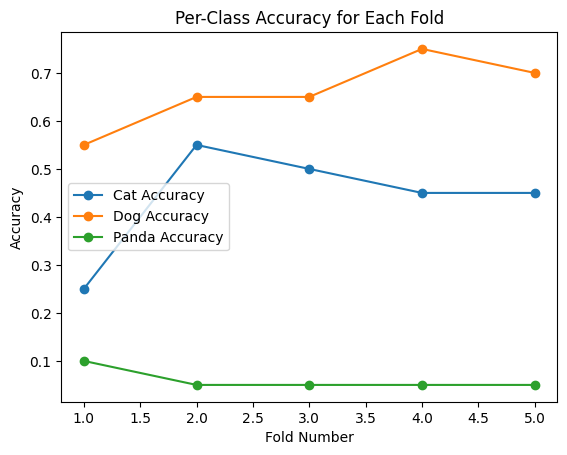

In [18]:
plt.plot(folds, cat_accuracies, marker='o', linestyle='-', label='Cat Accuracy')
plt.plot(folds, dog_accuracies, marker='o', linestyle='-', label='Dog Accuracy')
plt.plot(folds, panda_accuracies, marker='o', linestyle='-', label='Panda Accuracy')

plt.title('Per-Class Accuracy for Each Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
cv_results1 =[]

In [20]:
for fold, (train_index, test_index) in enumerate(kf.split(images, encoded_labels), 1):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]


    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)


    cv_results1.append(accuracy)


    print(f"Fold {fold} Accuracy: {accuracy:.4f}")

print("Cross-validation results:", cv_results)



Fold 1 Accuracy: 0.3000
Fold 2 Accuracy: 0.4167
Fold 3 Accuracy: 0.4000
Fold 4 Accuracy: 0.4167
Fold 5 Accuracy: 0.4000
Cross-validation results: [{np.str_('cat'): 0.25, np.str_('dog'): 0.55, np.str_('panda'): 0.1}, {np.str_('cat'): 0.55, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.5, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.75, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.7, np.str_('panda'): 0.05}]


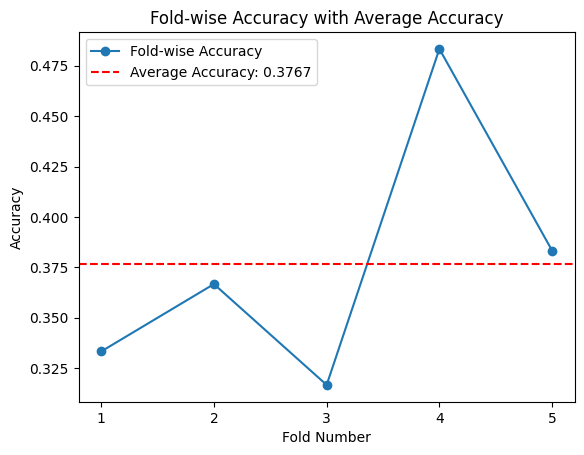

In [21]:
cv_results = [0.3333, 0.3667, 0.3167, 0.4833, 0.3833]
average_accuracy = np.mean(cv_results)
folds = [fold + 1 for fold in range(len(cv_results))]
plt.plot(folds, cv_results, marker='o', linestyle='-', label='Fold-wise Accuracy')
plt.axhline(y=average_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {average_accuracy:.4f}')
plt.title('Fold-wise Accuracy with Average Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.legend()
plt.show()

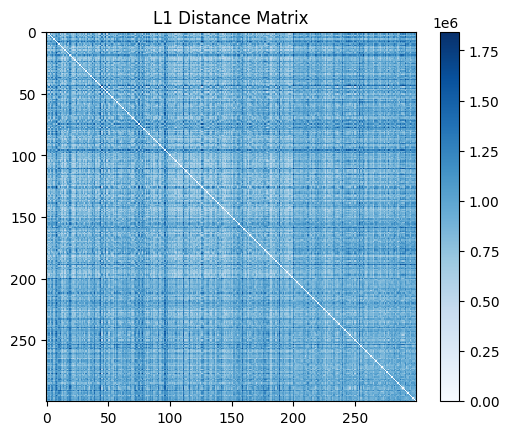

In [27]:
distance_matrix1 = cdist(images, images, metric='cityblock')
plt.imshow(distance_matrix1, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('L1 Distance Matrix')
plt.show()

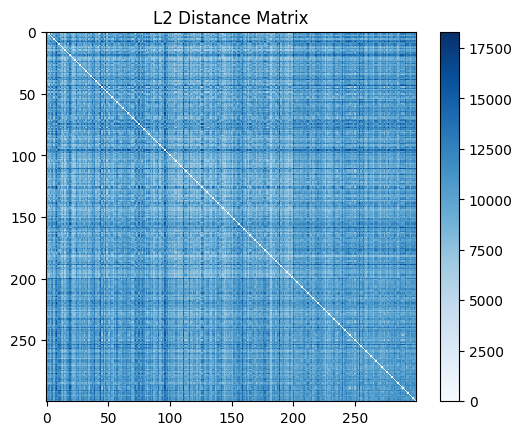

In [26]:
distance_matrix = cdist(images, images, metric='euclidean')


plt.imshow(distance_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('L2 Distance Matrix')
plt.show()